In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cohort vals - V04, V06, V10, BL

In [12]:
data_pqtl_raw = pd.read_csv('/content/drive/MyDrive/new attempt/pQTL_data_1.csv')
data_lrrk2_raw =  pd.read_csv('/content/drive/MyDrive/new attempt/research paper/Metabolomic_Analysis_of_LRRK2_PD_1_of_5_14Mar2025 (1).csv')


data_pqtl = data_pqtl_raw.copy()
data_lrrk2 = data_lrrk2_raw.copy()


print(data_lrrk2.columns)
print(data_pqtl.columns)

Index(['PATNO', 'SEX', 'COHORT', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME',
       'TESTVALUE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME',
       'PI_INSTITUTION', 'update_stamp'],
      dtype='object')
Index(['PATNO', 'SEX', 'COHORT', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME',
       'TESTVALUE', 'UNITS', 'PLATEID', 'RUNDATE', 'PROJECTID', 'PI_NAME',
       'PI_INSTITUTION', 'update_stamp'],
      dtype='object')


In [ ]:
split1 = data_pqtl['TESTNAME'].str.split('-', expand=True)
split2 = split1[1].str.split('_', expand=True)
data_pqtl['SEQ_ID'] = split1[0]
data_pqtl['VARIANT'] = split2[0]
data_pqtl['REPLICATE'] = split2[1]

data_pqtl['SEX'] = data_pqtl['SEX'].map({'Female': 0, 'Male': 1})
data_pqtl['COHORT'] = data_pqtl['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})

try:
  data_pqtl = data_pqtl.drop(columns=['TYPE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION'])
except:
  pass

data_pqtl




,PATNO,SEX,COHORT,CLINICAL_EVENT,TESTNAME,TESTVALUE,PLATEID,update_stamp,SEQ_ID,VARIANT,REPLICATE
0,53595,0,2,BL,5632-6_3,10.182013,P0022899,2022-05-13 10:38:41.0,5632,6,3
1,53595,0,2,BL,5631-83_3,6.346285,P0022899,2022-05-13 10:38:41.0,5631,83,3
2,53595,0,2,BL,5630-48_3,12.943830,P0022899,2022-05-13 10:38:41.0,5630,48,3
3,53595,0,2,BL,5629-58_3,5.891402,P0022899,2022-05-13 10:38:41.0,5629,58,3
4,53595,0,2,BL,5628-21_3,12.836350,P0022899,2022-05-13 10:38:41.0,5628,21,3
...,...,...,...,...,...,...,...,...,...,...,...
803875,3825,1,2,BL,12908-15_3,6.522282,P0022899,2022-05-13 10:38:08.0,12908,15,3
803876,3825,1,2,BL,12906-137_3,6.020084,P0022899,2022-05-13 10:38:08.0,12906,137,3
803877,3825,1,2,BL,12904-180_3,4.182774,P0022899,2022-05-13 10:38:08.0,12904,180,3
803878,3825,1,2,BL,12900-29_3,7.283812,P0022899,2022-05-13 10:38:08.0,12900,29,3


In [ ]:
data_lrrk2['MCR'] = data_lrrk2['TESTNAME'].str.extract(r'MZ([\d.]+)').astype(float)
data_lrrk2['RT'] = data_lrrk2['TESTNAME'].str.extract(r'RT([\d.]+)').astype(float)
data_lrrk2['Charge'] = data_lrrk2['TESTNAME'].str.contains('pos').astype(int)

data_lrrk2['SEX'] = data_lrrk2['SEX'].map({'Female': 0, 'Male': 1})
data_lrrk2['COHORT'] = data_lrrk2['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})

try:
  data_lrrk2 = data_lrrk2.drop(columns=['TYPE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'PROJECTID', 'TESTNAME'])
except:
  pass

data_lrrk2

,PATNO,SEX,COHORT,CLINICAL_EVENT,TESTVALUE,update_stamp,MCR,RT,Charge
0,40596,1,1,V04,2.975779e+04,2022-02-03 14:33:29.0,100.04,557.05,0
1,40596,1,1,V04,1.499038e+06,2022-02-03 14:33:29.0,100.08,243.17,1
2,40596,1,1,V04,0.000000e+00,2022-02-03 14:33:29.0,100.08,586.24,1
3,40596,1,1,V04,5.527887e+06,2022-02-03 14:33:29.0,100.11,212.92,1
4,40596,1,1,V04,1.907907e+05,2022-02-03 14:33:29.0,100.51,236.02,1
...,...,...,...,...,...,...,...,...,...
871779,3055,0,0,V08,5.538158e+06,2022-02-03 14:33:29.0,99.09,219.15,1
871780,3055,0,0,V08,1.658495e+06,2022-02-03 14:33:29.0,99.09,339.47,1
871781,3055,0,0,V08,3.884726e+05,2022-02-03 14:33:29.0,99.53,476.15,1
871782,3055,0,0,V08,1.872046e+05,2022-02-03 14:33:29.0,99.92,36.27,0


In [ ]:
groups = []
remainder = []

for patno, group in data_lrrk2.groupby("PATNO", sort=False):  # Preserves original order
    n_rows = len(group)
    split_idx = int(np.ceil(n_rows * 0.8))
    groups.append(group.iloc[:split_idx])     # First 80%
    remainder.append(group.iloc[split_idx:])  # Last 20%

# Concatenate results
df_reordered = pd.concat(groups + remainder, axis=0).reset_index(drop=True)

first_patient = df_reordered.iloc[0]["PATNO"]
switch_count = 0
inside_first_patient_block = False

for patno in df_reordered["PATNO"]:
    if patno == first_patient:
        if not inside_first_patient_block:
            switch_count += 1
            inside_first_patient_block = True
    else:
        inside_first_patient_block = False

print(f"Number of separate blocks for patient {first_patient}: {switch_count}")


Number of separate blocks for patient 40596: 2


In [ ]:
groups = []
remainder = []

for patno, group in data_lrrk2.groupby("PATNO", sort=False):  # Preserves original order
    n_rows = len(group)
    split_idx = int(np.ceil(n_rows * 0.8))
    groups.append(group.iloc[:split_idx])     # First 80%
    remainder.append(group.iloc[split_idx:])  # Last 20%

# Concatenate results
data_lrrk2 = pd.concat(groups + remainder, axis=0).reset_index(drop=True)




In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load data
df = data_pqtl

df.reset_index(drop = True, inplace = True)

# Drop unnecessary columns
try:
  df = df.drop(columns=['TYPE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'CLINICAL_EVENT', 'TESTNAME', 'PATNO', 'update_stamp', 'PLATEID'])
except:
  pass


# Define features and target
X = df.drop(columns=["TESTVALUE"])
y = df["TESTVALUE"]

# Identify categorical features
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
categorical_cols += ["SEX", "COHORT"]  # explicitly mark as categorical

# Preprocessing: one-hot encode categorical variables
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder="passthrough")  # keep numeric cols as-is

# Define pipeline
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", rmse)

In [ ]:
pip install torch

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# -------------------------------------------
# 1. Load Data
# -------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Load raw data
data_pqtl_raw = pd.read_csv('/content/drive/MyDrive/new attempt/pQTL_data_1.csv')
data_lrrk2_raw = pd.read_csv('/content/drive/MyDrive/new attempt/research paper/Metabolomic_Analysis_of_LRRK2_PD_1_of_5_14Mar2025 (1).csv')

# Make working copies
data_lrrk2 = data_lrrk2_raw.copy()
data_pqtl = data_pqtl_raw.copy()

# -------------------------------------------
# 2. Feature Engineering
# -------------------------------------------
# Extract MCR and RT from TESTNAME
data_lrrk2['MCR'] = data_lrrk2['TESTNAME'].str.extract(r'MZ([\d.]+)').astype(float)
data_lrrk2['RT'] = data_lrrk2['TESTNAME'].str.extract(r'RT([\d.]+)').astype(float)
data_lrrk2['Charge'] = data_lrrk2['TESTNAME'].str.contains('pos', case=False).astype(int)

# Encode categorical variables
data_lrrk2['SEX'] = data_lrrk2['SEX'].map({'Female': 0, 'Male': 1})
data_lrrk2['COHORT'] = data_lrrk2['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})

# Drop irrelevant columns
cols_to_drop = ['TYPE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'TESTNAME']
data_lrrk2.drop(columns=[col for col in cols_to_drop if col in data_lrrk2.columns], inplace=True)

# Drop rows with missing values
data_lrrk2.dropna(subset=['MCR', 'RT', 'Charge', 'SEX', 'COHORT', 'TESTVALUE'], inplace=True)

# -------------------------------------------
# 3. Prepare Data for PyTorch
# -------------------------------------------
features = ['MCR', 'RT', 'Charge', 'SEX', 'COHORT']
target = 'TESTVALUE'

X = data_lrrk2[features].values
y = data_lrrk2[target].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------------------
# 4. Define PyTorch Dataset and Dataloader
# -------------------------------------------
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_data = TabularDataset(X_train, y_train)
test_data = TabularDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# -------------------------------------------
# 5. Define MLP Model
# -------------------------------------------
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = MLPRegressor(input_dim=X.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# -------------------------------------------
# 6. Training Loop
# -------------------------------------------
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# -------------------------------------------
# 7. Evaluate on Test Set
# -------------------------------------------
model.eval()
with torch.no_grad():
    preds = []
    actuals = []
    for X_batch, y_batch in test_loader:
        output = model(X_batch)
        preds.extend(output.view(-1).tolist())
        actuals.extend(y_batch.view(-1).tolist())

rmse = mean_squared_error(actuals, preds, squared=False)
print(f"Test RMSE: {rmse:.2f}")


Epoch [10/100], Loss: 49690739976936368.0000
Epoch [20/100], Loss: 49687931310155328.0000


KeyboardInterrupt: 

In [ ]:
groups = []
remainder = []

for patno, group in data_pqtl.groupby("PATNO", sort=False):  # Preserves original order
    n_rows = len(group)
    split_idx = int(np.ceil(n_rows * 0.8))
    groups.append(group.iloc[:split_idx])     # First 80%
    remainder.append(group.iloc[split_idx:])  # Last 20%

# Concatenate results
df_reordered = pd.concat(groups + remainder, axis=0).reset_index(drop=True)

first_patient = df_reordered.iloc[0]["PATNO"]
switch_count = 0
inside_first_patient_block = False

for patno in df_reordered["PATNO"]:
    if patno == first_patient:
        if not inside_first_patient_block:
            switch_count += 1
            inside_first_patient_block = True
    else:
        inside_first_patient_block = False

print(f"Number of separate blocks for patient {first_patient}: {switch_count}")


Number of separate blocks for patient 53595: 2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Load dataset
df = df_reordered

# Map categorical columns to numeric
df['SEX'] = df['SEX'].map({'Female': 0, 'Male': 1})
df['COHORT'] = df['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})
df['CLINICAL_EVENT'] = df['CLINICAL_EVENT'].map({'BL': 1}).fillna(0).astype(int)

# Extract SEQ_ID and VARIANT from TESTNAME
split1 = df['TESTNAME'].str.split('-', expand=True)
split2 = split1[1].str.split('_', expand=True)
df['SEQ_ID'] = split1[0].astype(float)
df['VARIANT'] = split2[0].astype(float)

# Final feature list
features = ['SEX', 'COHORT', 'CLINICAL_EVENT', 'SEQ_ID', 'VARIANT']
target = 'TESTVALUE'

# Drop missing rows
df = df.dropna(subset=features + [target])

# Input and target
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])


# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10, batch_size=32)

# Evaluate
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}, MAE: {mae:.4f}")


KeyError: 'CLINICAL_EVENT'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 6.8471 - mae: 1.9282 - val_loss: 5.7546 - val_mae: 1.8405
Epoch 2/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - loss: 5.5974 - mae: 1.7857 - val_loss: 5.7158 - val_mae: 1.7820
Epoch 3/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 5.5467 - mae: 1.7794 - val_loss: 5.6841 - val_mae: 1.7969
Epoch 4/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 5.5652 - mae: 1.7823 - val_loss: 5.6935 - val_mae: 1.7927
Epoch 5/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 5.5535 - mae: 1.7774 - val_loss: 5.6892 - val_mae: 1.8149
Epoch 6/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 5.5586 - mae: 1.7809 - val_loss: 5.6730 - val_mae: 1.7864
Epoch 7/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 5.5540 - mae: 1.7786 - val_loss: 5.6763 - val_mae: 1.7755
Epoch 8/50
18088/18088 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 5.5253 - mae: 1.7755 - val_loss: 5.6852 - val_mae: 1.7874
Epoch 9/50
18088

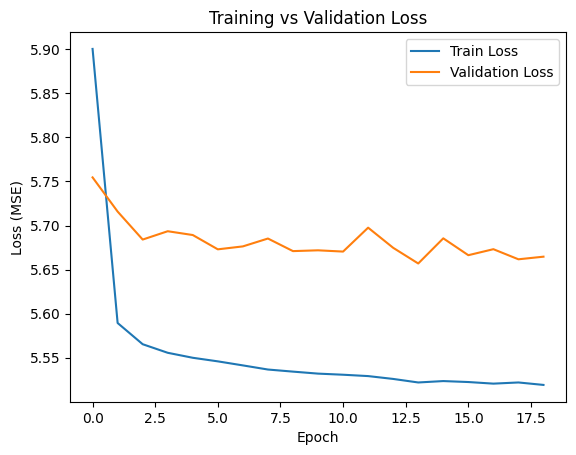

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/new attempt/pQTL_data_1.csv")

# ===========================
# Step 1: Patient-wise 80-20 Split
# ===========================
groups = []
remainder = []

for patno, group in df.groupby("PATNO", sort=False):
    n_rows = len(group)
    split_idx = int(np.ceil(n_rows * 0.8))
    groups.append(group.iloc[:split_idx])     # First 80%
    remainder.append(group.iloc[split_idx:])  # Remaining 20%

df_train = pd.concat(groups).reset_index(drop=True)
df_test = pd.concat(remainder).reset_index(drop=True)

# ===========================
# Step 2: Preprocessing
# ===========================

# Map categorical to numeric
df_train['SEX'] = df_train['SEX'].map({'Female': 0, 'Male': 1})
df_test['SEX'] = df_test['SEX'].map({'Female': 0, 'Male': 1})

df_train['COHORT'] = df_train['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})
df_test['COHORT'] = df_test['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})

# Map CLINICAL_EVENT to numeric categories (e.g. BL, V01, V02...)
df_train['CLINICAL_EVENT'] = df_train['CLINICAL_EVENT'].astype('category').cat.codes
df_test['CLINICAL_EVENT'] = df_test['CLINICAL_EVENT'].astype('category').cat.codes

# Extract SEQ_ID and VARIANT
split1_train = df_train['TESTNAME'].str.split('-', expand=True)
split2_train = split1_train[1].str.split('_', expand=True)
df_train['SEQ_ID'] = split1_train[0].astype(float)
df_train['VARIANT'] = split2_train[0].astype(float)

split1_test = df_test['TESTNAME'].str.split('-', expand=True)
split2_test = split1_test[1].str.split('_', expand=True)
df_test['SEQ_ID'] = split1_test[0].astype(float)
df_test['VARIANT'] = split2_test[0].astype(float)

# Drop missing rows
features = ['SEX', 'COHORT', 'CLINICAL_EVENT', 'SEQ_ID', 'VARIANT']
target = 'TESTVALUE'
df_train = df_train.dropna(subset=features + [target])
df_test = df_test.dropna(subset=features + [target])

# ===========================
# Step 3: Input & Scaling
# ===========================
X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================
# Step 4: MLP Model
# ===========================
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ===========================
# Step 5: Evaluation
# ===========================
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss: {loss:.4f}, MAE: {mae:.4f}")

# Optional: Extra metrics
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# ===========================
# Step 6: Plot Loss Curve
# ===========================
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


        PATNO  SEX  COHORT  CLINICAL_EVENT                 TYPE    TESTNAME  \
382800   3003    0       2               0  Cerebrospinal Fluid  11289-31_3   
382801   3003    0       2               0  Cerebrospinal Fluid  11288-26_3   
382802   3003    0       2               0  Cerebrospinal Fluid  11287-14_3   
382803   3003    0       2               0  Cerebrospinal Fluid  11286-78_3   
382804   3003    0       2               0  Cerebrospinal Fluid   11285-8_3   

        TESTVALUE     UNITS   PLATEID     RUNDATE  PROJECTID      PI_NAME  \
382800   6.605336  log2 RFU  P0022899  2019-08-04        151  David Stone   
382801   7.869877  log2 RFU  P0022899  2019-08-04        151  David Stone   
382802   6.820047  log2 RFU  P0022899  2019-08-04        151  David Stone   
382803   7.708862  log2 RFU  P0022899  2019-08-04        151  David Stone   
382804   6.410961  log2 RFU  P0022899  2019-08-04        151  David Stone   

       PI_INSTITUTION           update_stamp   SEQ_ID  VARIANT

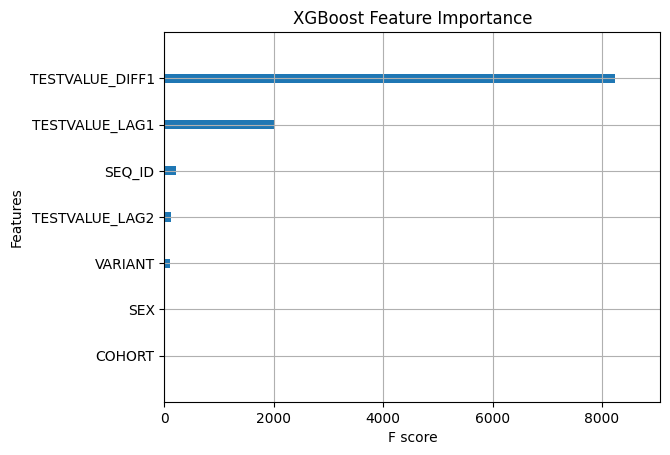

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# ===========================
# Step 1: Load Data
# ===========================
df = pd.read_csv("/content/drive/MyDrive/new attempt/pQTL_data_1.csv")

# ===========================
# Step 2: Sort for Lag Features
# ===========================
df = df.sort_values(['PATNO', 'CLINICAL_EVENT'])

# ===========================
# Step 3: Preprocessing
# ===========================
# Map categorical values
df['SEX'] = df['SEX'].map({'Female': 0, 'Male': 1})
df['COHORT'] = df['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})

# Encode CLINICAL_EVENT
df['CLINICAL_EVENT'] = df['CLINICAL_EVENT'].astype('category').cat.codes

# Extract SEQ_ID and VARIANT
split1 = df['TESTNAME'].str.split('-', expand=True)
split2 = split1[1].str.split('_', expand=True)
df['SEQ_ID'] = split1[0].astype(float)
df['VARIANT'] = split2[0].astype(float)

# Remove rare variants
variant_counts = df['VARIANT'].value_counts()
common_variants = variant_counts[variant_counts > 10].index
df = df[df['VARIANT'].isin(common_variants)]

# ===========================
# Step 4: Lag Features
# ===========================
df['TESTVALUE_LAG1'] = df.groupby('PATNO')['TESTVALUE'].shift(1)
df['TESTVALUE_LAG2'] = df.groupby('PATNO')['TESTVALUE'].shift(2)
df['TESTVALUE_DIFF1'] = df['TESTVALUE'] - df['TESTVALUE_LAG1']

print(df.head())

# Drop missing lag values
df = df.dropna(subset=['TESTVALUE_LAG1', 'TESTVALUE_LAG2', 'TESTVALUE_DIFF1'])

# ===========================
# Step 5: Patient-wise Split (80% train, 20% test per patient)
# ===========================
groups, remainder = [], []

for patno, group in df.groupby("PATNO", sort=False):
    n_rows = len(group)
    split_idx = int(np.ceil(n_rows * 0.8))
    groups.append(group.iloc[:split_idx])
    remainder.append(group.iloc[split_idx:])

df_train = pd.concat(groups).reset_index(drop=True)
df_test = pd.concat(remainder).reset_index(drop=True)

# ===========================
# Step 6: Feature and Target Setup
# ===========================
features = ['SEX', 'COHORT', 'CLINICAL_EVENT', 'SEQ_ID', 'VARIANT',
            'TESTVALUE_LAG1', 'TESTVALUE_LAG2', 'TESTVALUE_DIFF1']

# Optional: Add 'MCR', 'RT', 'Charge' if they exist
for col in ['MCR', 'RT', 'Charge']:
    if col in df.columns:
        features.append(col)

target = 'TESTVALUE'

# Drop NaNs just in case
df_train = df_train.dropna(subset=features + [target])
df_test = df_test.dropna(subset=features + [target])

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

# ===========================
# Step 7: Train XGBoost Regressor
# ===========================
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# ===========================
# Step 8: Evaluate
# ===========================
y_pred = model.predict(X_test)

print(" R² Score:", r2_score(y_test, y_pred))
print(" MAE:", mean_absolute_error(y_test, y_pred))
print(" MSE:", mean_squared_error(y_test, y_pred))

# ===========================
# Step 9: Predict Final 10 Values
# ===========================
print("\n Next 10 Predicted TESTVALUEs:")
print(model.predict(X_test.tail(10)))

# ===========================
# Step 10: Feature Importance
# ===========================
xgb.plot_importance(model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Load your CSV data (assuming it's in a file named 'data.csv')
df = pd.read_csv("your_data.csv")

# Optional: sort by update_stamp if available
# df = df.sort_values(by='update_stamp')

# Feature selection
features = ['MCR', 'RT', 'Charge', 'SEX', 'COHORT']
X = df[features]
y = df['TESTVALUE']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split: all except last 10 rows
X_train, X_test = X_scaled[:-10], X_scaled[-10:]
y_train, y_test = y[:-10], y[-10:]

# Train a regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict the next 10 test values
predictions = model.predict(X_test)
print("Predicted next 10 TESTVALUEs:", predictions)


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# ===========================
# Step 1: Load Data
# ===========================
df = pd.read_csv("/content/drive/MyDrive/new attempt/research paper/Metabolomic_Analysis_of_LRRK2_PD_1_of_5_14Mar2025 (1).csv")

# ===========================
# Step 2: Sort for Lag Features
# ===========================
df = df.sort_values(['PATNO', 'CLINICAL_EVENT'])

# ===========================
# Step 3: Preprocessing
# ===========================
# Map categorical values
df['SEX'] = df['SEX'].map({'Female': 0, 'Male': 1})
df['COHORT'] = df['COHORT'].map({'Control': 0, 'Prodromal': 1, 'PD': 2})

# Encode CLINICAL_EVENT
df['CLINICAL_EVENT'] = df['CLINICAL_EVENT'].astype('category').cat.codes

# Extract SEQ_ID and VARIANT
split1 = df['TESTNAME'].str.split('-', expand=True)
split2 = split1[1].str.split('_', expand=True)
df['SEQ_ID'] = split1[0].astype(float)
df['VARIANT'] = split2[0].astype(float)

# Remove rare variants
variant_counts = df['VARIANT'].value_counts()
common_variants = variant_counts[variant_counts > 10].index
df = df[df['VARIANT'].isin(common_variants)]

# ===========================
# Step 4: Lag Features
# ===========================
df['TESTVALUE_LAG1'] = df.groupby('PATNO')['TESTVALUE'].shift(1)
df['TESTVALUE_LAG2'] = df.groupby('PATNO')['TESTVALUE'].shift(2)
df['TESTVALUE_DIFF1'] = df['TESTVALUE'] - df['TESTVALUE_LAG1']

print(df.head())

# Drop missing lag values
df = df.dropna(subset=['TESTVALUE_LAG1', 'TESTVALUE_LAG2', 'TESTVALUE_DIFF1'])

# ===========================
# Step 5: Patient-wise Split (80% train, 20% test per patient)
# ===========================
groups, remainder = [], []

for patno, group in df.groupby("PATNO", sort=False):
    n_rows = len(group)
    split_idx = int(np.ceil(n_rows * 0.8))
    groups.append(group.iloc[:split_idx])
    remainder.append(group.iloc[split_idx:])

df_train = pd.concat(groups).reset_index(drop=True)
df_test = pd.concat(remainder).reset_index(drop=True)

# ===========================
# Step 6: Feature and Target Setup
# ===========================
features = ['SEX', 'COHORT', 'CLINICAL_EVENT', 'SEQ_ID', 'VARIANT',
            'TESTVALUE_LAG1', 'TESTVALUE_LAG2', 'TESTVALUE_DIFF1']

# Optional: Add 'MCR', 'RT', 'Charge' if they exist
for col in ['MCR', 'RT', 'Charge']:
    if col in df.columns:
        features.append(col)

target = 'TESTVALUE'

# Drop NaNs just in case
df_train = df_train.dropna(subset=features + [target])
df_test = df_test.dropna(subset=features + [target])

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

# ===========================
# Step 7: Train XGBoost Regressor
# ===========================
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# ===========================
# Step 8: Evaluate
# ===========================
y_pred = model.predict(X_test)

print(" R² Score:", r2_score(y_test, y_pred))
print(" MAE:", mean_absolute_error(y_test, y_pred))
print(" MSE:", mean_squared_error(y_test, y_pred))

# ===========================
# Step 9: Predict Final 10 Values
# ===========================
print("\n Next 10 Predicted TESTVALUEs:")
print(model.predict(X_test.tail(10)))

# ===========================
# Step 10: Feature Importance
# ===========================
xgb.plot_importance(model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance")
plt.show()


KeyError: 1